## Observations and Insights 

In [1]:
%matplotlib inline

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer')
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice=combined_data_df["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_mice_id=pd.DataFrame(dup_mice)
all_dup_mice_id

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Found this code online
clean_df = combined_data_df[combined_data_df['Mouse ID'].isin(dup_mice)==False]

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
numofmice_clean=len(clean_mice)
numofmice_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [9]:
#Running each to get them grouped
##finding the mean
mean_tumor_gb = combined_data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mean_tumor_gb

##Finding the Median
med_tumor_gb = combined_data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
med_tumor_gb

##Finding the Variance
var_tumor_gb = combined_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
var_tumor_gb

##Finding the Standard Deviation
std_tumor_gb = combined_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
std_tumor_gb

##Finding the SEM
sem_tumor_gb = combined_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
sem_tumor_gb

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#Combine into a single Data Frame
summary_df = pd.DataFrame({"Mean": mean_tumor_gb, "Median" : med_tumor_gb, "Variance" : var_tumor_gb, 
                          "Standard Dev" :std_tumor_gb, "SEM" :sem_tumor_gb})
summary_df

summary_df.to_csv("Summary_Data.csv", index=False, header=True)

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
easy_group = clean_df.groupby('Drug Regimen')

In [12]:
#Farshad/Slack help find this awnser 
Summary_stats_table = easy_group.agg(['mean', 'median','var','std', 'sem'])['Tumor Volume (mm3)']
Summary_stats_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

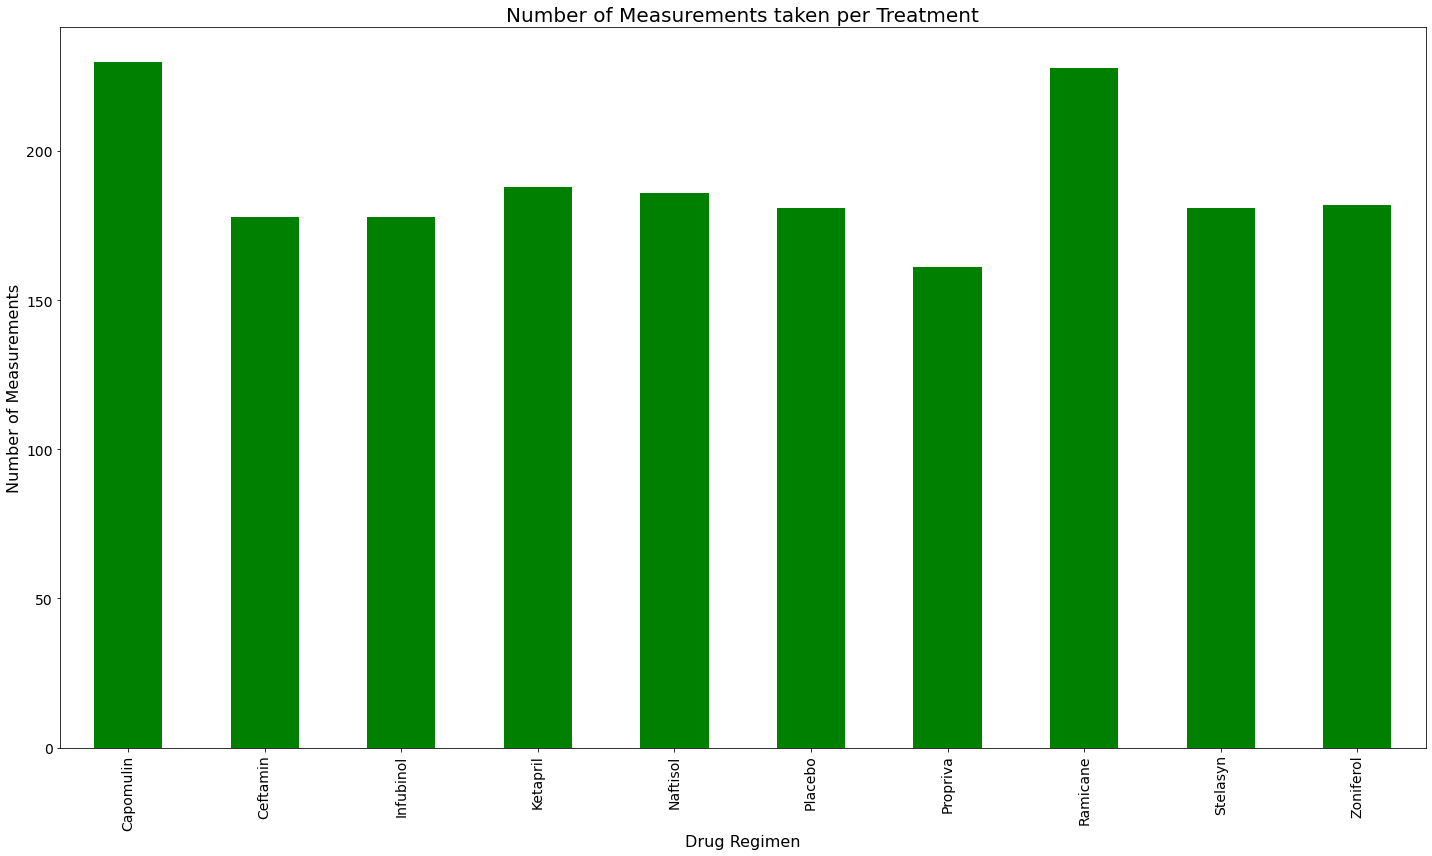

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Creating plots
num_mice_per = combined_data_df.groupby(['Drug Regimen']).count()['Mouse ID']

#Creating the Bar Chart
plot_pandas= num_mice_per.plot.bar(figsize= (20,12), color = 'g', fontsize = 14)
num_mice_per
plt.xlabel("Drug Regimen", fontsize = 16)
plt.ylabel("Number of Measurements", fontsize = 16)
plt.title("Number of Measurements taken per Treatment", fontsize = 20)

plt.tight_layout()
plt.show()



In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Creating an array for plotting
mice_array = (combined_data_df.groupby(['Drug Regimen'])["Mouse ID"].count()).tolist()
mice_array

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Number of Measurements')

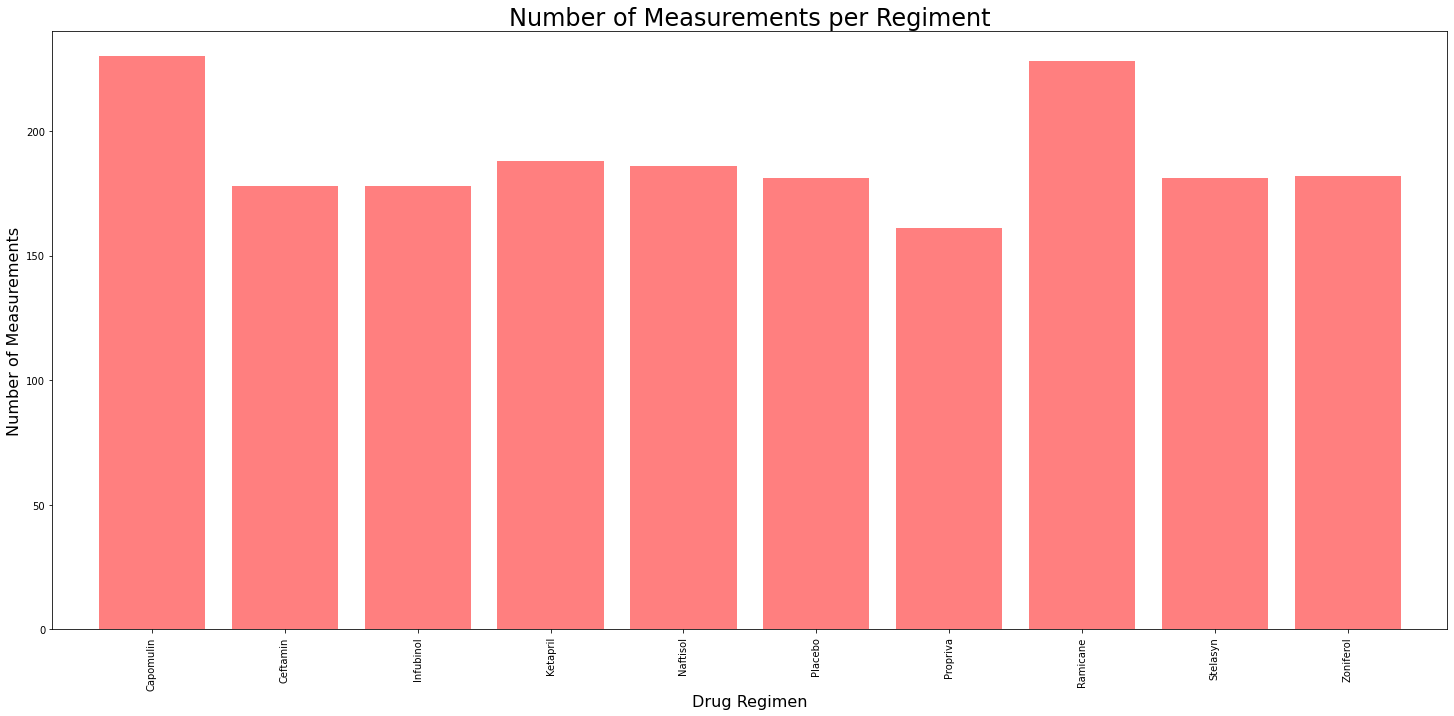

In [15]:
#Making chart with pyplot
#most code is from lesson plan 2
x_axis = np.arange(len(num_mice_per))
fig1, ax1 = plt.subplots(figsize=(25,11))
plt.bar(x_axis, mice_array, color= 'r', alpha=0.5, align='center')

#setting tick locations
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  
           rotation ='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_array)+10)

plt.title("Number of Measurements per Regiment",fontsize = 24)
plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("Number of Measurements",fontsize = 16)


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#  Group by gender and get the number to plot
sex_gb= combined_data_df.groupby(["Mouse ID","Sex"])
sex_gb
gender_df = pd.DataFrame(sex_gb.size())


In [17]:
#creating a Dataframe with total count
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

In [18]:
#creating a precentage column
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#Show dataframe
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


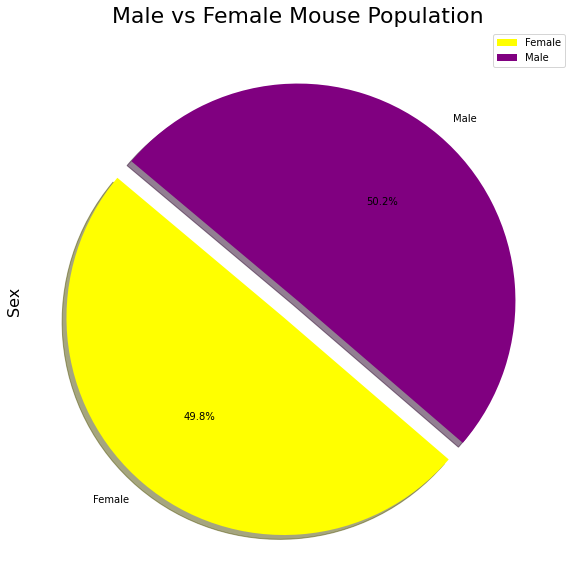

In [19]:
#Generating the pie chart
colors = ['yellow', 'purple']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y= 'Total Count', figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 22)
plt.ylabel('Sex',fontsize = 16)

plt.show()

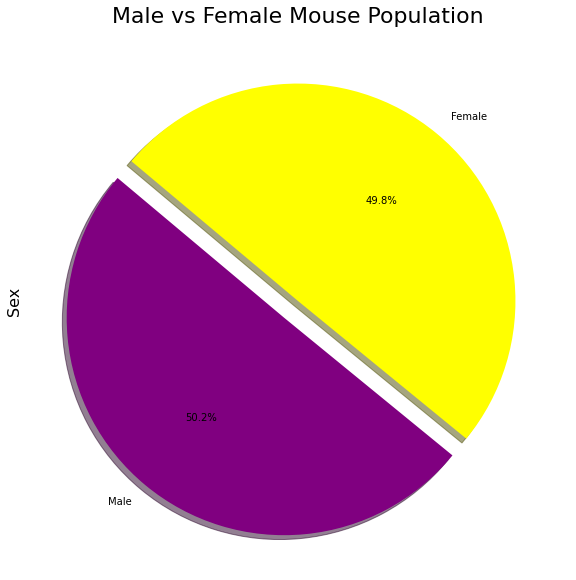

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Designating variables and titles
labels = ['Male','Female']
values = [50.200803,49.799197]
colors = ['purple','yellow']

#setting the explode
explode = (0.1, 0)

#Creating the pie chart
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(values, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 22)
plt.ylabel('Sex',fontsize = 16)

plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Pull data to perfrom IQR test
last_regimen = combined_data_df[combined_data_df['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_regimen = last_regimen.sort_values(["Timepoint"], ascending=True)

#formatting dataframe for easier reading
last_regimen_data = last_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#look at the new dataframe
last_regimen_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [22]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_regimen_end = last_regimen_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
last_regimen_end.head()

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
Name: Tumor Volume (mm3), dtype: float64

In [23]:
#Turning groupby data into a dataframe (thanks to Terry Ashley github)
last_regime_df=last_regimen_end.to_frame()
last_regime_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [24]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack(found on Iryna K Github)
unstack_tumor = last_regime_df.stack(level=0).unstack(level=0)
# View the result to confirm transpose
unstack_tumor.head()


,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Tumor Volume (mm3),NaN,NaN,67.973419,NaN
a251,Tumor Volume (mm3),NaN,NaN,65.525743,NaN
a275,Tumor Volume (mm3),NaN,62.999356,NaN,NaN
a411,Tumor Volume (mm3),NaN,NaN,NaN,38.407618
a444,Tumor Volume (mm3),NaN,NaN,NaN,43.047543


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
Drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers.
 #Using a for loop
    
for reigime in Drugs:
    quartiles = unstack_tumor[reigime].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    #Used Iryna K code since format/code is exactly what we need and looks clean
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{reigime} IQR data is:")
    print(f"The lower quartile of {reigime} is: {lowerq}")
    print(f"The upper quartile of {reigime} is: {upperq}")
    print(f"The interquartile range of {reigime} is: {iqr}")
    print(f"The the median of {reigime} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {reigime} could be outliers.")
    print(f"Values above {upper_bound} for {reigime} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 for Infubinol could be outliers.


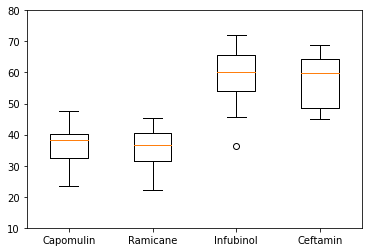

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
wiskerplot_df = last_regime_df.reset_index()
tumor_lists = wiskerplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(Drugs)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=Drugs)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_data = combined_data_df.loc[combined_data_df['Drug Regimen']=='Capomulin']

capo_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


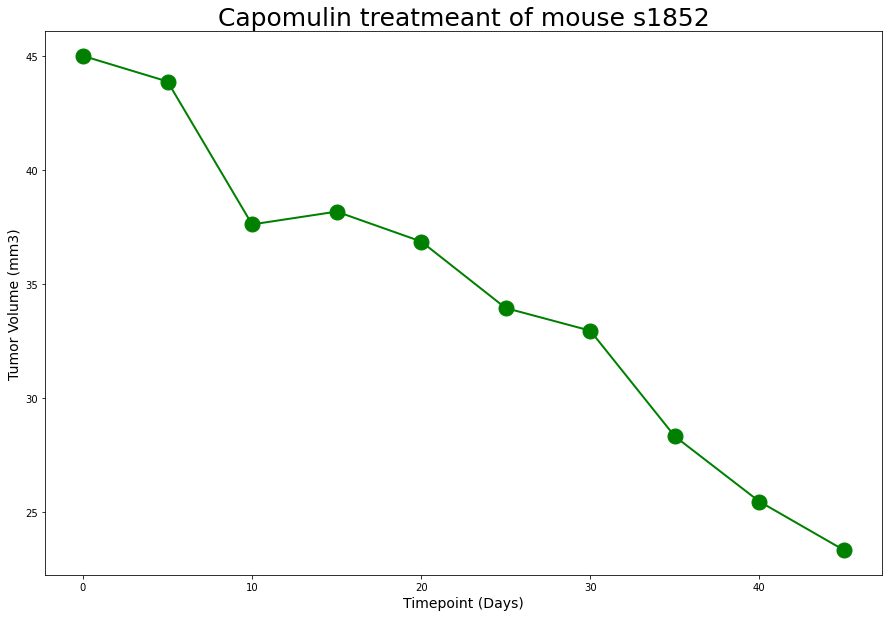

In [40]:
time_tumor=capo_data[capo_data['Mouse ID'].isin(['s185'])]
time_tumor

x_axis = time_tumor["Timepoint"]
itsatumor = time_tumor["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse s1852',fontsize =25)
plt.plot(x_axis, itsatumor,linewidth=2, markersize=15,marker="o",color="green", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

plt.show()

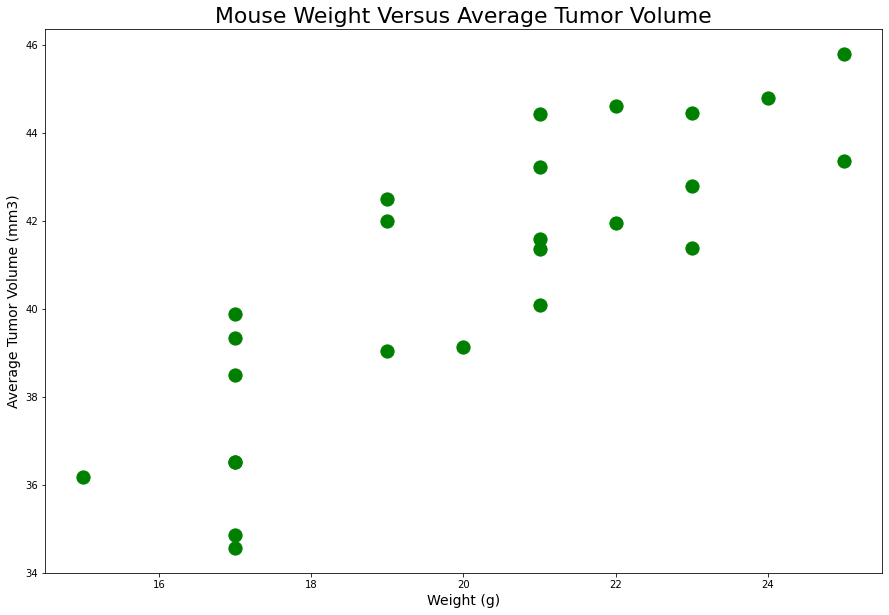

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15,10))
avg_cap_vol = capo_data.groupby(['Mouse ID']).mean()

marker_size = 10
plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'],s=175, color="green")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =22)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)

plt.show()

## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = st.pearsonr(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(corr[0],2)}")

The correlation between both factors is 0.84


In [46]:
#including r-squared with the regression line
x_values = avg_cap_vol['Weight (g)']
y_values = avg_cap_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"r-squared:{rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

r-squared:0.8419363424694718
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


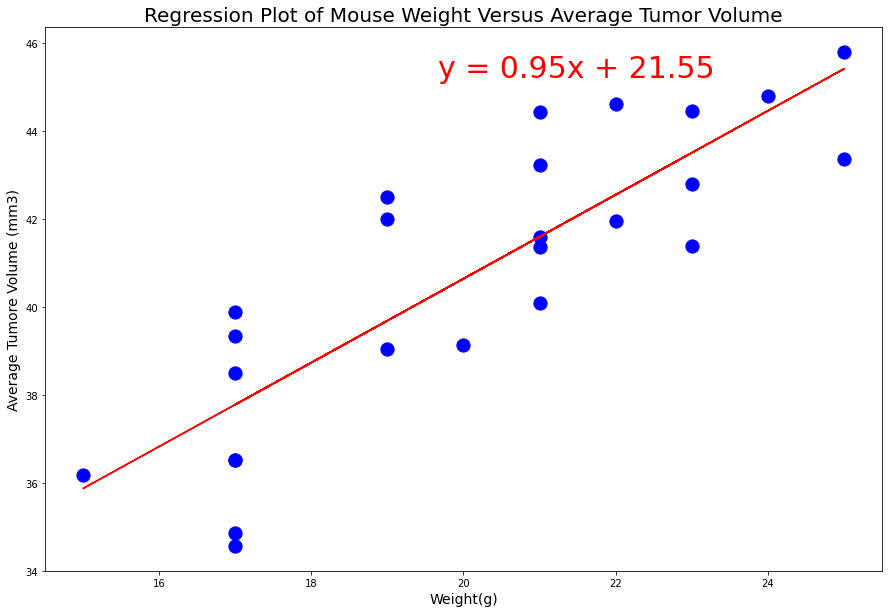

In [47]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()